# Random Variables

***Reading: Emile-Geay: Chapter 3***


# A. Discrete Random Variables

In [8]:
#%reset
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
figsize=[6,3]

# These are some parameters to make figures nice (and big)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)


https://en.wikipedia.org/wiki/Random_variable

###  From random process to random variables

Consider the random process of throwing a six-sided fair die,
$\Omega$={<span>&#9856;,&#9857;,&#9858;,&#9859;,&#9860;,&#9861;</span>}


**Definition**: Random variable
For our purspose we can define a (univariate) random variable $X$ is a function that defined on the sample space of a random process that associates a real number for every event in the event space of the sample space.

$$ X:\Omega \rightarrow \mathbb{R}$$

We will denote by capital $X$ the random variable, i.e., the function from $\mathcal S$ to $\mathbb R$,  and by small cap $x$, the value the random variable $X$ takes in the real numbers.

Examples of random variables: the result of rolling a dice. The total amount of rainfall falling in a day. The duration of rainfall falling in a day. The magnitude of an Earthquake. 


## 1. Examples of discrete random variables
### 1.1 Uniform discrete random variable


A simple example of a random variable is that of a uniform discrete random variable. For example, consider the random variable $X$ that is associated with the value on the face of a die. This random variable takes discrete values between 1 and 6. 

**Simulation** 

We can simulate this random variable using the <code>stats.randint.rvs</code> method from the <code>scipy</code> library. 

However, remember that python interprets intervals as closed on the left(lower bound) 
and open on the right (upper bound). If you specify a bound in python using $a$ and $b$, Python itnerprets it as $[a,b)$. So to specify the discrete itnerval $[1,6]$ we actually have to specify it as $[1,7)$. This is sometimes called left-inclusive right-exclusive, because the value on the left (lower bound) is included, whereas the value on the right (upper bound) is excluded. 

The <code>stats</code> class has a method to generate <code>randint</code> objects to describe a uniform discrete (integer-valued) random variable- 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html

<br>
The bottom of the above documentation page for <code>randint</code> describes the methods. One of the methods associated with this random variable is the <code>rvs</code> which generates samples (draws) from such a random variable (i.e. simulate the roll of a die). 



In [2]:


#Simulate random variable taking values between 1 (inclusive) and 7 (exclusive). 
#Let's say we only want to simulate this random variable once
# Rerun this cell several times to simulate a throw of the dice

X=stats.randint.rvs(low=1, high=7, size=1)
print(X)

[2]


### 1.2 Bernoulli Random Variable
A Bernoulli random variable is a variable that can only take values of $1$ or $0$. It takes a value of $1$ with probability $p$ and $0$ with probability $1-p$

We can simulate a random variable using the fair die. For example, we can define a Bernoulli random variable $Y$ which takes value $1$ if the roll is larger than 3, and $0$ otherwise. In this case, the Bernoulli random variable has $p=0.5$.
Run the code block below a few times.

In [3]:
# rerun this cell to simulate more realizations of a bernoulli random variable
X=stats.randint.rvs(low=1, high=7, size=1)
if X>3: 
    Y=1
else: 
    Y=0
print(Y)

1


Another way to generate a Bernoulli random variable with $p=1$ is by flipping a fair coin, and assigning $1$ for heads and $0$ for tails. 

We could generate a Bernoulli random variable with $p=1/3$ by defining it as taking value 1 if the die roll is larger than 4 (i.e. 5 or 6), and zero otherwise. 

In practice, we can generate realizations of a Bernoulli random variable with any $p$ using the same <code>stats</code> module from <code>scipy</code>. 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html

In [6]:
# Rerun this cell to generate Bernoulli random variables with $p=0.5$
X=stats.bernoulli.rvs(p=0.5, size=1)
print(X)

[1]


We can also generate more than one realization/sample of a random variable at once in python, by specifiying a size argument:

In [7]:
# Rerun this cell to generate Bernoulli random variables with $p=0.9$
X=stats.bernoulli.rvs(p=0.9, size=50)
print(X)

[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1]


### 1.3 Sum of two dice
Let's take another example of a random variable. Consider rolling two fair dice

![two_dice.png](M01_two_dice.png)

And define a random variable $S$ whose value is the sum of the two dice rolls. 

![dice_sum](M01_dice_sum.png)

We can generate realizations of this random variable by generating two (independent) dice and taking their sum


In [10]:
X=stats.randint.rvs(low=1, high=7, size=1)
Y=stats.randint.rvs(low=1, high=7, size=1)
S=X+Y
print(S)

[6]


<hr style="border:1px solid black"> </hr>

## 2. Distributions of discrete random variable

### 2.1 Probability mass functions
How do we describe the possible outcome of a random variable? Random variables can be described - and are actually defined - by their distribution functions. Instead of a "bernoulli random variable" we will usually say a "Bernoulli-distributed random variable". 


For discrete random variables these distributions functions are called **probability mass functions (pmf)**. the pmf of a random variable $X$ is: 

$$p(x_i)=P(X=x_i),$$ 

sometimes denoted as 

$$p_X(x_i).$$

$p(x_i)$ is the probability that the random variable $X$ takes the value $x_i$. For the uniform discrete random variable associated with a roll of the dice the distribution function is pretty straight-forward. It takes value of 1/6 if $x_i\in\{1,2,3,4,5,6\}$ and zero otherwise. 

The Bernoulli random variable with parameter p has a similarly straightforward pmf, which takes value of $p$ for $x_i$=1, and $1-p$ for $x_i=0$. 

The table above also allows us to easily compute the pmf for the sum of two fair dice. The pmf only takes non-zero values for $x_i\in\{1,\ldots,12\}$. For example $p(5)$ is the probability of rolling a total of 5, and it can be read from the table as $p(5)=4/36=1/9$

Let's visualize the pmfs for the three random variables described. The random variable objects <code>scipy.stats</code> have the pmf as a method

**Uniformly distributed random variable (Sincle dice)**


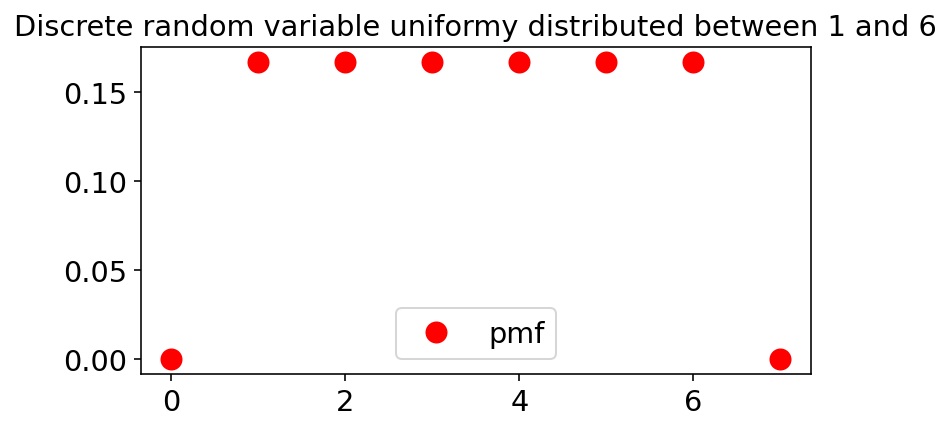

In [30]:
#define an x-axis
x=np.arange(0,8,1)

#plot 
fig, ax = plt.subplots(1, 1,figsize=figsize)

ax.plot(x, stats.randint.pmf(x,low=1,high=7), 'ro',ms=10,
        label='pmf')
ax.set_title('Discrete random variable uniformy distributed between 1 and 6')
ax.legend(loc='best')
plt.show()

**Bernoulli Random variable** 

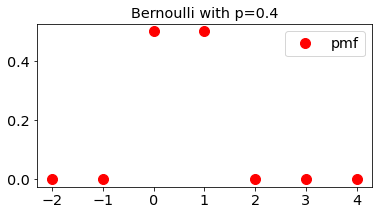

In [12]:
#Bernoulli random variable with p=0.5

p=0.5
#define an x-axis
x=np.arange(-2,5,1)

#plot 
fig, ax = plt.subplots(1, 1,figsize=figsize)

ax.plot(x, stats.bernoulli.pmf(x,p), 'ro',ms=10,
        label='pmf')
ax.set_title('Bernoulli with p=0.4')
ax.legend(loc='best')
plt.show()

**Sum of two dice**

We don't have a ready-made method for generating a random variable with the same distribution as the sum of two random variables. But we can define and read the pmf from the table above

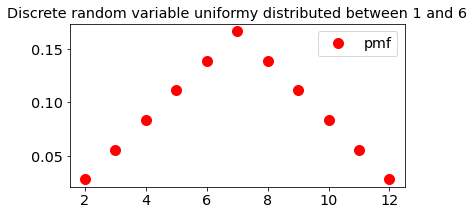

In [13]:
# define the pmf
x_2dice=[2,3,4,5,6,7,8,9,10,11,12]
p_2dice=np.asarray([1,2,3,4,5,6,5,4,3,2,1])/36

#notice we need to make the pmf p_2dice as numpy array.

fig, ax = plt.subplots(1, 1,figsize=figsize)

ax.plot(x_2dice, p_2dice, 'ro',ms=10,
        label='pmf')
ax.set_title('Discrete random variable uniformy distributed between 1 and 6')
ax.legend(loc='best');


### 2.2 Realization/Draw
We would call the value of the random variable associated with a throw of the dice a **realization** or **draw** of the random process and of the random variable. 
The cell above generates a single realizatoin of the random variable. But we can generate multiple realizatoins at once and save them in an array



In [14]:
#Rerun this cell several times to simulate 20 realizations 
#of a Uniform Discrete Random Variable  (i.e. 20 throws of the die)
X=stats.randint.rvs(low=1, high=7, size=20)
print(X)

[6 3 5 5 5 1 4 5 1 1 6 5 4 1 2 2 3 2 1 6]


### 2.3 Histograms

<b>Definition</b>: A histogram is an *approximate* representation of the distribution of a random variable, done through computing the frequency of observations occuring in certain ranges of values.

To compute a histogram we have to draw realizations of a ranodm variable, define a set of bins, and count the number of realizations within each bin. Let's do that for the three random variables discussed, and compare it with the pmf

Note ther are several ways to compute a histogram: Using <a href="https://numpy.org/doc/stable/reference/generated/numpy.histogram.html">numpy.histrogram</a>,<a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.histogram.html">scipy.histogram</a>, or <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html">matplotlib.pyplot.hist</a>.

**Discrete uniform RV (one die)**

In [15]:
Ndraws=100

# PMF
x_uniform=np.arange(0,8,1)
p_uniform=stats.randint.pmf(x_uniform,low=1,high=7)

# generate random variables and define edges 
# (note we want the integers to be in the bins, not at the edges)
X_uniform=stats.randint.rvs(low=1, high=7, size=Ndraws)
bin_edges_uniform=np.arange(0.5,8.5,1)

print(X_uniform)


[1 3 3 1 2 6 6 2 1 2 4 6 5 2 6 1 2 4 3 1 4 2 3 2 6 3 3 3 3 2 6 6 4 2 1 4 5
 2 4 2 3 6 4 6 2 4 5 6 6 4 3 4 3 1 2 3 1 6 2 6 1 5 3 3 6 6 6 3 5 4 4 6 1 5
 4 3 6 1 5 2 3 2 5 4 1 2 2 4 1 5 3 1 4 6 6 5 3 6 3 1]


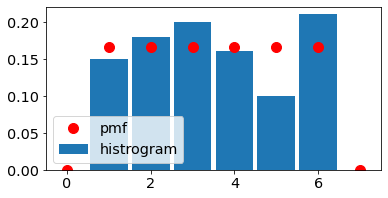

In [16]:
fig, ax = plt.subplots(1, 1,figsize=figsize)


ax.hist(X_uniform,bins=bin_edges_uniform,density=True,rwidth=0.9,label='histrogram')
ax.plot(x_uniform,p_uniform , 'ro',ms=10,
        label='pmf');
ax.legend();
ax.set_xlim(left=-0.5, right=7.5);

**Bernoulli**

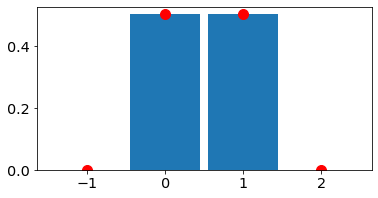

In [17]:
N_draws=10;
p_bern=0.5;

#PMF
x_bernoulli=np.arange(-1,3,1)
p_bernoulli=stats.bernoulli.pmf(x_bernoulli,p=p_bern)

# generate random variables and define edges 
#(note we want the integers to be in the bins, not at the edges)
X_bernoulli=stats.bernoulli.rvs(p=p_bern, size=N_draws)
bin_edges_bernoulli=np.arange(-1.5,3.5,1)


#Plot
fig, ax = plt.subplots(1, 1,figsize=figsize)
ax.hist(X_bernoulli,bins=bin_edges_bernoulli,density=True,rwidth=0.9)
ax.plot(x_bernoulli, p_bernoulli, 'ro',ms=10,
        label='pmf');

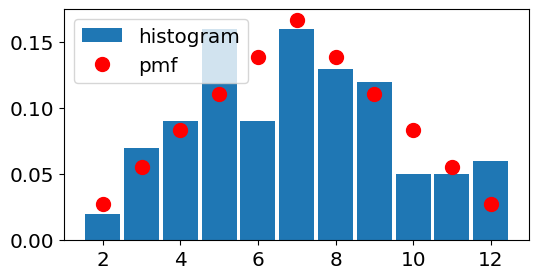

In [10]:
Ndraws=100

# PMF
x_2dice=[2,3,4,5,6,7,8,9,10,11,12]
p_2dice=np.asarray([1,2,3,4,5,6,5,4,3,2,1])/36

# generate random variables and define edges 
# (note we want the integers to be in the bins, not at the edges)
X_1die=stats.randint.rvs(low=1, high=7, size=Ndraws)
Y_1die=stats.randint.rvs(low=1, high=7, size=Ndraws)
Z_2dice=X_1die+Y_1die

bin_edges_2dice=np.arange(1.5,13.5,1)


fig, ax = plt.subplots(1, 1,figsize=figsize)

ax.hist(Z_2dice,bins=bin_edges_2dice,density=True,rwidth=0.9,label='histogram')
ax.plot(x_2dice, p_2dice, 'ro',ms=10,
        label='pmf');
ax.legend();


```{Danger}
For *discrete* random variables the histogram can give weird results if the bins are not set appropriately (for example if they are of unequal weidth)
```


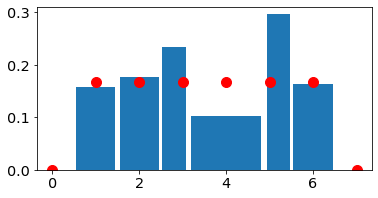

In [19]:
Ndraws=400

# PMF
x_uniform=np.arange(0,8,1)
p_uniform=stats.randint.pmf(x_uniform,low=1,high=7)

# generate random variables and define edges 
# (note we want the integers to be in the bins, not at the edges)
X_uniform=stats.randint.rvs(low=1, high=7, size=Ndraws)

#compare teh two below:
#bin_edges_uniform=np.asarray([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
bin_edges_uniform=np.asarray([0.5, 1.5, 2.5, 3.1, 4.9, 5.5, 6.5])


fig, ax = plt.subplots(1, 1,figsize=figsize)


ax.hist(X_uniform,bins=bin_edges_uniform,density=True,rwidth=0.9)
ax.plot(x_uniform,p_uniform , 'ro',ms=10,
        label='pmf');

### 2.4 Convergence of histograms to pmfs

As the number of draws, or realizations of the random variables increases, the histogram becomes a better and better approximation for the pmf.

$$h_N(x_i)\rightarrow p(x_i)$$

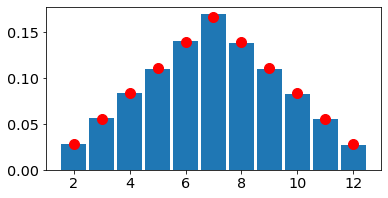

In [20]:
# change the number of draws for the 2 dice case
Ndraws=100000

# PMF
x_2dice=[2,3,4,5,6,7,8,9,10,11,12]
p_2dice=np.asarray([1,2,3,4,5,6,5,4,3,2,1])/36

# generate random variables and define edges 
# (note we want the integers to be in the bins, not at the edges)
X_1die=stats.randint.rvs(low=1, high=7, size=Ndraws)
Y_1die=stats.randint.rvs(low=1, high=7, size=Ndraws)
Z_2dice=X_1die+Y_1die

bin_edges_2dice=np.arange(1.5,13.5,1)


fig, ax = plt.subplots(1, 1,figsize=figsize)

ax.hist(Z_2dice,bins=bin_edges_2dice,density=True,rwidth=0.9)
ax.plot(x_2dice, p_2dice, 'ro',ms=10,
        label='pmf');

# B. Continous random variables




Just like a discrete random variable (r.v.) , a continous random variable is a function that is defined on a samples 
space and takes value in the real numbers. However, unlike a discrete r.v. which takes a discrete set of values either finite or countably infinite, a continuous r.v. takes an uncountable number of values. For example, it might take any 
value in a given interval, or it might take any value in the real numbers. 

In this class, we will almost exclusively deal with continuous random variables, used to describe properties such as temperature, velocity, etc of continuous media such as as air, water, Earth's mantle, etc.  

## 1 Distribution functions
### 1.1 Cumulative Distribution function (CDF).

The cumulative distribiution function (CDF), $F(x)$, of a random variable - wheteher discrete or continuous - is defined as: 

$$F(x)=P(X\leq x)$$

The CDF exists for any random variable, is piece-wise continous, and takes values between 0 an 1. If the random variables takes values in the interval $[x_{min},x_{max}]$, then $F(x)=0$ for $x<x_{min}$ and $F(x)=1$ for $x>x_{max}$

For a discrete random variable: 

$$F(x)=\sum_i P(X=x_i)=\sum_{i:x_i<x}f(x_i)$$ 

where $f(x_i)$ is the pmf of X. For a discrete r.v. the CDF is going to look like a staircase, with jumps at the values $x_i$ that $X$ can take. 

In contrast, continuous random variables will have a continous CDFs. For the continous random variables considered in this class, the CDF will also be differentiable. Which means that we can also define a probability density function. 




### 1.2 Probability density functions (pdf) for continuous r.v.s

The distribution of a continuous random variable is generally defined by a probability density function, or *pdf*. We will denote the pdf of r.v. $X$ by $f_X(x)$ or, more commonly, simply by $f(x)$. The pdf of $X$ is the probability that $X$ takes a values in an infinitesimalinterval around $x$:

$$f(x)=P(X\in [x,x+dx])$$

or 

$$P(x\in [x_1,x_2])=\int_{x_1}^{x_2} f(x)dx$$

The pdf of a continuous r.v. must satisfy a few properties, such as $ \int_{-\infty}^{+\infty}f(x)dx=1$ and $f(x)>0$. There is a simple relation between the CDF and the pdf of a continuous r.v. analaogos to that between the CDF and the pmf of a discrete r.v.:

$$F(x)=P(X<x)=\int_{-\infty}^{u}f(u)du$$

### 1.3 Histogram
Just like for discrete r.v.s, we can use a histogram to approximate the pdf of a continuous random variable. The histogram makes more sense for a continous random variable. To compute a histogram we will need to define a set of bin edges ${x_i}$, the histogram counts the number of realizations in each bin. So, 

$$h(x_i,x_j)= \text{# of realizations of }X\text{ between }x_i,x_j. $$

A scaled, or normed, histogram is

$$h(x_i,x_{i+1})= \frac{\text{# of realizations of }X\text{ between }x_i,x_{i+1}}{(\text{total # of realizations of }X )(x_{i+1}-x_i)}. $$

For a very large number of realizations, the histogram will be equal to the average value of the pdf within a bin:

$$h(x_i,x_{i+1})\approx \overline {f(x_i)}=\frac{\int_{x_i}^{x_i+1} f(u)du}{x_{i+1}-x_i}$$

As long as the lower bin $x_1$ is low enough that the probability of X taking values lower than it is small or zero, $f(x)\approx0$, for $x<x_1$, we can also use a histogram to approximate a CDF: 

$$F(x_i)=\int_{-\infty}^{x_i}f(u)du \approx \sum_{j=0}^{j-1}\int_{x_i}^{x_i+1} f(u)du\approx\sum_{j=1}^{i-1} h(x_j,x_j+1)\cdot (x_{i+1}-x_i)$$

All of the above will make more sense with some examples:
<hr style="border:2px solid black"> </hr>

## 2 Examples of continuous random variables
### 2.1 Uniform 
The uniform distribution is the distribution of a random variable which has equal probabiliy of taking any value within an interval. The interval can be either open or closed, e.g. $[a,b], [a,b)$ or $(a,b)$. The pdf of a continuous uniform r.v. defined in $[a,b]$ is

$$p(x)=\begin{cases}
\frac{1}{b-a} & \text{if }x\in[a,b]\\
0 & \text{if }x\notin[a,b]
\end{cases}$$

the $1/(b-a)$ comes from the condition that the pdf integrates to $1$. The CDF of a uniform r.v. is. 

$$F(x)=\int_{-\infty}^{x}f(u)du$$

$$F(x)=\begin{cases}
0 & \text{if }x<a\\
\frac{x-a}{b-a} & \text{if }x\in[a,b]\\
1 & \text{if }x>b
\end{cases}$$



Let's plot the pdf & CDF of a uniform random variable 

Note <code>scipy</code> defines a continous uniform r.v. distribution in terms of location <code>loc</code> and <code>scale</code>, parameters, i.e. the r.v. is defined in $[\text{loc},\text{loc}+\text{scale}]$. 


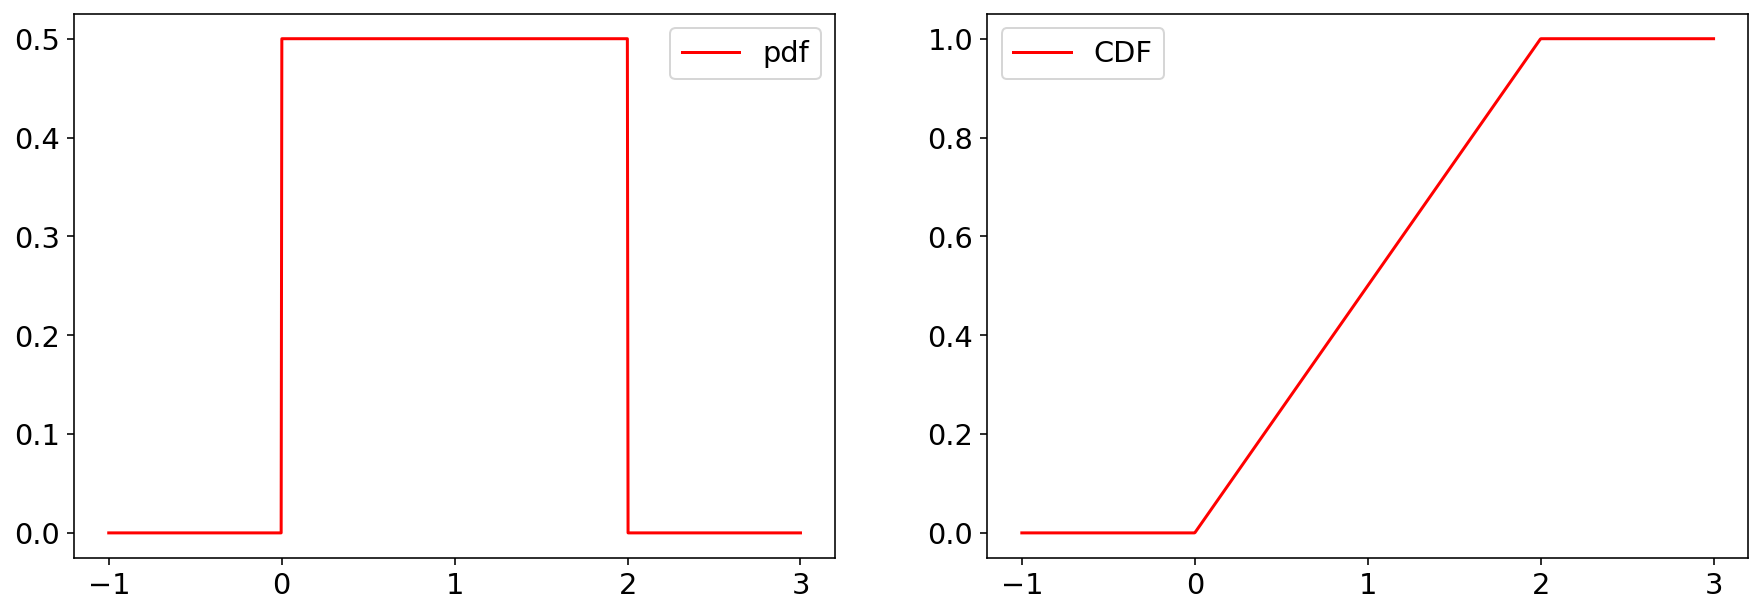

In [22]:
from scipy import stats

# let's define a uniform r.v. on the interval 0,2
loc=0;
scale=2;


# pdf,cdf
x_uniform=np.linspace(-1,3,1000)
f_uniform=stats.uniform.pdf(x_uniform,loc=loc,scale=scale)
F_uniform=stats.uniform.cdf(x_uniform,loc=loc,scale=scale)

#plot
fig, ax = plt.subplots(1, 2)

ax[0].plot(x_uniform,f_uniform , 'r-',ms=10,label='pdf')
ax[0].legend()

ax[1].plot(x_uniform,F_uniform , 'r-',ms=10,label='CDF')
ax[1].legend()


Let's generate some samples and compute a histogram.

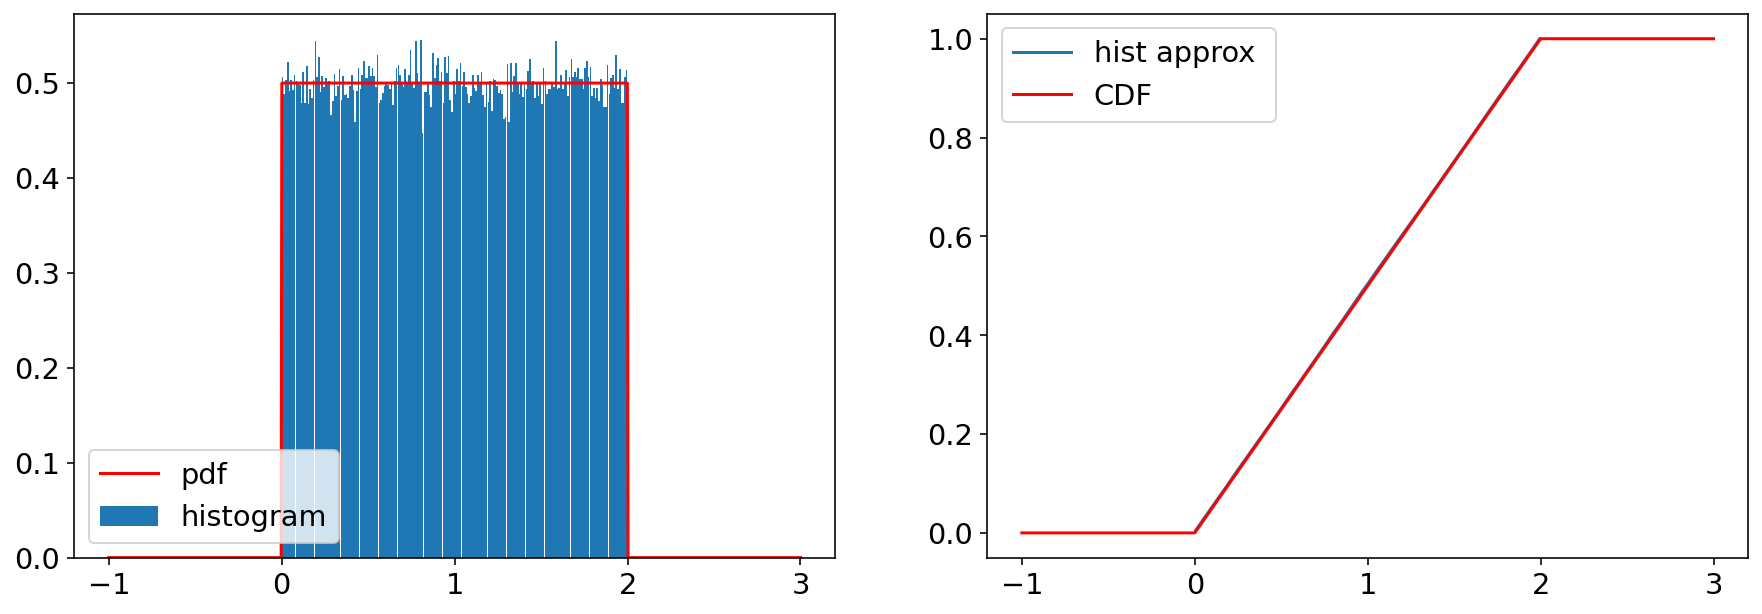

In [23]:
loc=0;
scale=2;

Ndraws=200000;
Nbin_edges=201;

# pdf,cdf
x_uniform=np.linspace(-1,3,1000)
f_uniform=stats.uniform.pdf(x_uniform,loc=loc,scale=scale)
F_uniform=stats.uniform.cdf(x_uniform,loc=loc,scale=scale)


# generate random variables 
X_uniform=stats.uniform.rvs(loc=loc,scale=scale, size=Ndraws)
# let's examine the draws. remember they should be uniformyl distributed between loc and loc+scale
#print(X_uniform)


# let's compute the histogram, compare it to the pdf, and use it to approximate the CDF
# we'll use the numpy histogram function, since we need the values of the histogram. 
# Note the numpy histogram function outputs both histogram values and bin edges. 
#We only need the values, so we need to take the first component, [0], of the output

bin_edges_uniform=np.linspace(0,2,Nbin_edges)
bin_centers=(bin_edges_uniform[1:]+bin_edges_uniform[0:-1])/2

histogram=np.histogram(X_uniform,bin_edges_uniform, density=True)[0]
F_approx=np.cumsum(histogram)*np.mean(np.diff(bin_edges_uniform))

fig, ax = plt.subplots(1, 2)
ax[0].hist(X_uniform,bin_edges_uniform,density=True,rwidth=0.95,label='histogram')
ax[0].plot(x_uniform,f_uniform , 'r-',ms=10,label='pdf')
ax[0].legend()

ax[1].plot(bin_centers,F_approx,label='hist approx ')
ax[1].plot(x_uniform,F_uniform , 'r-',ms=10,label='CDF')
ax[1].legend()


### 2.1 Normal/Gaussian
The most common distribution we will encounter is the Gaussian (or Normal distribution). It is the most commonly occuring distribution in nature - and it is in fact the *central* distribution to which other distributions gravitate, as we shall discuss later. More properties of the gaussian distribution will come up thrughout the course, but let's introduce it here: 

The pdf of a gaussian(normal distribution) is defined by two parameters, $\mu$ and $\sigma$, called the location and the scale parameter, which, as we shall see, are also the mean and standard deviation. We wil learn more about these parameters in the next chapter, but it's easier to illustrate them once we have some distributions from which we can generate samples. 

$$f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right]$$

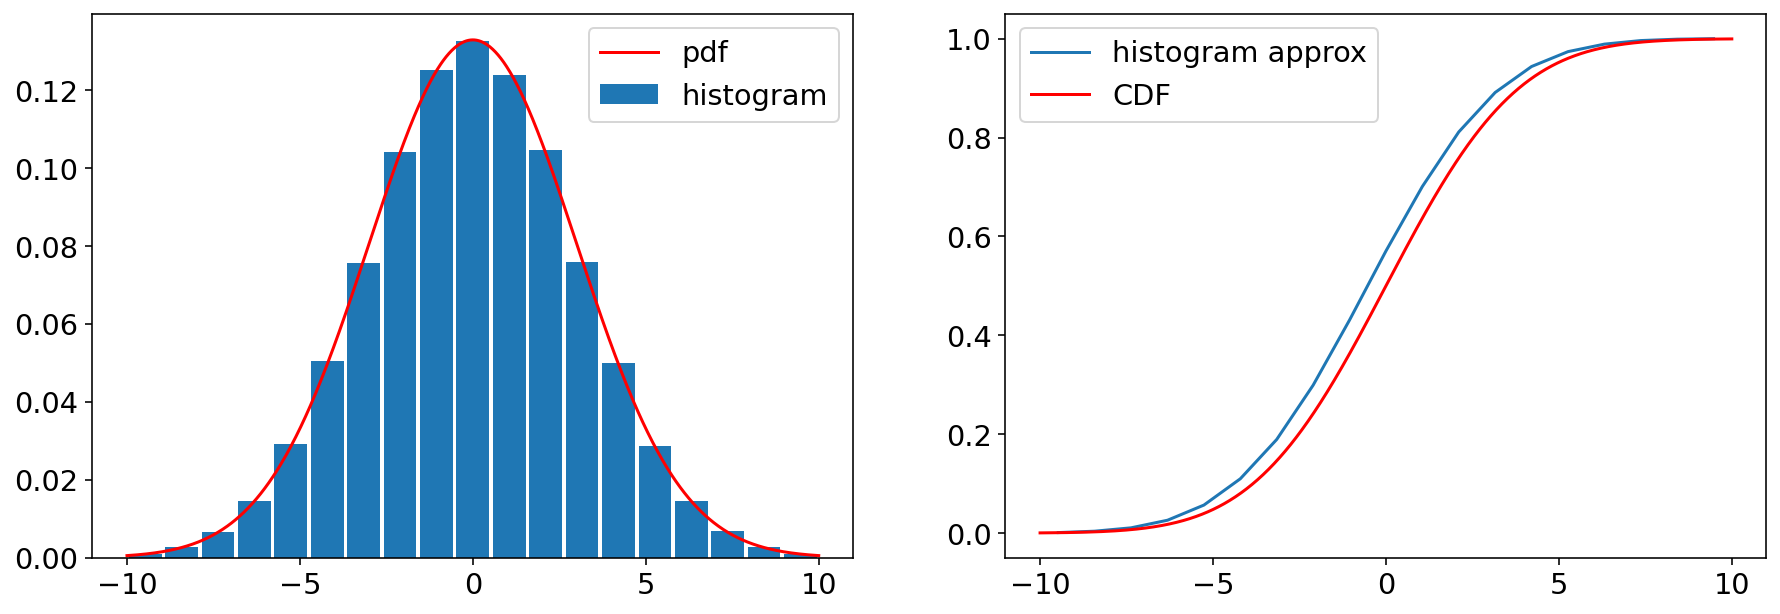

In [24]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# scipy defines mu as locatiom, and sigma as scale. 
# Play around with these parametrs to see how the distribution changes. 


xlim_left=-10;
xlim_right=10;

mu=0;
sigma=3;

# you should also play arond with the number of draws and bins of the histogram.
# there are some guidelines for choosing the number of bins (Emile-Geay's book talks a bit about them)
Ndraws=200000;
Nbin_edges=20;

# pdf,cdf
x_norm=np.linspace(xlim_left,xlim_right,1000)
f_norm=stats.norm.pdf(x_norm,loc=mu, scale=sigma)
F_norm=stats.norm.cdf(x_norm,loc=mu,scale=sigma)

# generate random variables and define edges (note we want the integers to be in the bins, not at the edges)
X_norm=stats.norm.rvs(loc=mu,scale=sigma, size=Ndraws)
bin_edges_norm=np.linspace(xlim_left,xlim_right,Nbin_edges)

bin_edges=np.linspace(xlim_left,xlim_right,Nbin_edges)
bin_centers=(bin_edges[1:]+bin_edges[0:-1])/2
histogram=np.histogram(X_norm,bin_edges, density=True)[0]
F_approx=np.cumsum(histogram)*np.mean(np.diff(bin_edges))


fig, ax = plt.subplots(1,2)



ax[0].plot(x_norm,f_norm , 'r-',ms=10,label='pdf')
ax[0].hist(X_norm,bins=bin_edges_norm,density=True,rwidth=0.9,label='histogram')
ax[0].legend()

ax[1].plot(bin_centers,F_approx,label='histogram approx')
ax[1].plot(x_norm,F_norm , 'r-',ms=10,label='CDF')

ax[1].legend()


ax[1].legend()



## 3. Mixed random variables
Some random variables are "mixed" random variables, where the distribution contains a discrete part, and a continuous part. 

Take, for example, the distribution of precipitation amount at Willard airport from 1997 until today.

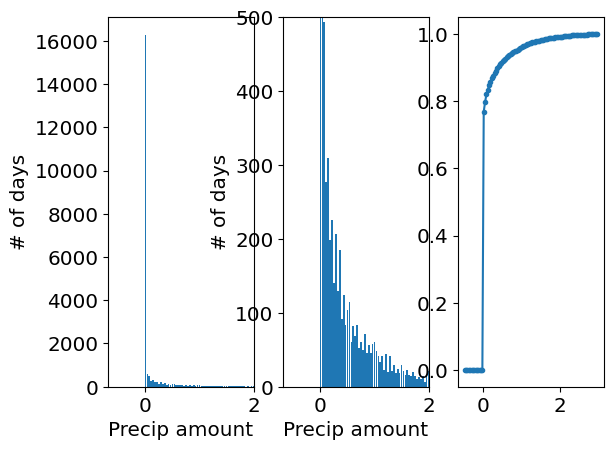

In [3]:
import pandas as pd

df=pd.read_csv('https://github.com/cdds-uiuc/simles-book/raw/main/content/Module02/data/Beaumont_precip.csv')
precip_willard=df['PRCP'];

Nbin_edges=100
xlim_left=-0.5
xlim_right=3

bin_edges=np.linspace(xlim_left,xlim_right,Nbin_edges)
bin_centers=(bin_edges[1:]+bin_edges[0:-1])/2
histogram=np.histogram(precip_willard,bin_edges, density=True)[0]
F_approx=np.cumsum(histogram)*np.mean(np.diff(bin_edges))



fig, ax = plt.subplots(1, 3)
ax[0].hist(precip_willard,bin_edges,density=False,rwidth=0.9)
ax[0].set_xlim(right=2)
ax[0].set_ylabel('# of days')
ax[0].set_xlabel('Precip amount')


ax[1].hist(precip_willard,bin_edges,density=False,rwidth=0.9)
ax[1].set_xlim(right=2)
ax[1].set_ylim(top=500)
ax[1].set_ylabel('# of days')
ax[1].set_xlabel('Precip amount')

ax[2].plot(bin_centers,F_approx,'.-',label='CDF approximation')
# approximate the cdf

What do we see? Notice the jump in the CDF at 0. This means there is about an $80\%$ probability that there is no rain, i.e. it only rains on $20\%$ of days. So for $x=0$, there is a finite probability $P(X=0)=20\%$. For everything else, the probability is (in principle) continuous, and described by a continous pdf that describes the probability of precipitation falling in an infinitesimal interval around x. 

In practice, when working with real data all distributions will be discretized by the measurement precision of the instrument used.



# C Exercises
Plot the pdf, cdf, and draw histogram for a few other common distributions. The easiest way to find the relevant modules in scipy.stats is to google "scipy stats poisson" and so on.

Here are a few suggestions:
- Discrete:
    - poisson distribution
    - binomial distribution
- Continuous
    - exponential distribution
    - laplace distribution
    - gamma distribution
